In [919]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import chi2_contingency



## Data info

In [920]:
# reading intakes.csv
df = pd.read_csv('intakes.csv')
df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [921]:
df1 = pd.read_csv('outcomes.csv')
df1.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [922]:
df.info() # number and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


In [923]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


In [924]:
df.describe() #count, number of unique

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,138585,97316,138585,138585,138585,138585,138585,138585,138584,138585,138585,138585
unique,123890,23544,97442,103,58367,6,15,5,5,54,2741,616
top,A721033,Max,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,624,64,2189,26051,95283,119320,78145,45635,23667,32194,14470


In [925]:
df1.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,138769,97514,138769,138769,138769,138746,63435,138769,138768,138764,138769,138769
unique,124068,23425,115364,103,7576,9,26,5,5,54,2749,619
top,A721033,Max,04/18/2016 12:00:00 AM,Jun 2019,05/01/2016,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,621,39,2244,119,63518,33597,78138,48877,24024,32515,14481


In [926]:
print(f'number of rows: {df.shape[0]}\nnumber of columns: {df.shape[1]}')

number of rows: 138585
number of columns: 12


In [927]:
print(f'number of rows: {df1.shape[0]}\nnumber of columns: {df1.shape[1]}') #more outcomes than incomes

number of rows: 138769
number of columns: 12


In [928]:
df.isnull().sum() # how many zerous 

Animal ID               0
Name                41269
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

In [929]:
df1.isnull().sum()

Animal ID               0
Name                41255
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75334
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
dtype: int64

In [930]:
df.duplicated().sum() # sum of duplicated parametrs

20

In [931]:
df1.duplicated().sum()

17

## Cleaning the data

In [932]:
#checking nan
#df1['Name'].unique()

In [933]:
#df1['Outcome Subtype'].unique()

In [934]:
#df['Animal Type'].unique()

In [935]:
#df['Age upon Intake'].unique()

In [936]:
#df['Sex upon Intake'].unique()

In [937]:
#df1['Sex upon Outcome'].unique() 

In [938]:
df['Sex upon Intake'].replace("Unknown", np.nan, inplace=True) 
# Changing Unknown on NaN

In [939]:
df1['Sex upon Outcome'].replace("Unknown", np.nan, inplace=True)

In [940]:
df['Age upon Intake'].replace({"0 years": np.nan,"0 year": np.nan, "0 months": np.nan, "0 month": np.nan, "0 days": np.nan, "0 day": np.nan, "0": np.nan}, inplace=True)

In [941]:
df1['Age upon Outcome'].replace({"0 years": np.nan,"0 year": np.nan, "0 months": np.nan, "0 month": np.nan, "0 days": np.nan, "0 day": np.nan, "0": np.nan}, inplace=True)

In [942]:
df.isnull().sum() #Sex and Age parametr changed considerably

Animal ID               0
Name                41269
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake     11070
Age upon Intake       889
Breed                   0
Color                   0
dtype: int64

In [943]:
df1.isnull().sum()

Animal ID               0
Name                41255
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75334
Animal Type             0
Sex upon Outcome    11053
Age upon Outcome      214
Breed                   0
Color                   0
dtype: int64

In [944]:
#changing cotegory data to cotegory type
category_columns = ['Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake']
category_columns1 = ['Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome']

for column in category_columns:
    df[column] = df[column].astype('category')
    
for column1 in category_columns1:
    df1[column1] = df1[column1].astype('category')

In [945]:
# making age parametr to numbers in years (float)

def years(age):
    if pd.isnull(age) or not isinstance(int, object):
        return np.NaN
    number, measure = age.split() #splitting to 2 words(number and mesure)
    number = float(number) #number str to int
    if 'year' in measure or 'years' in measure:
        return round(number, 2)
    elif 'month' in measure or 'months' in measure:
        return round(number / 12, 2) 
    elif 'week' in measure or 'weeks' in measure:
        return round(number / 52, 2)
    elif 'day' in measure or 'days' in measure:
        return round(number / 365, 2)
    else:
        return np.NaN
    

In [946]:
df['Age upon Intake'] = df['Age upon Intake'].apply(years) #call the function

In [947]:
df['Age upon Intake'].unique()

array([ 2.0e+00,  8.0e+00,  9.2e-01,  8.0e-02,  4.0e+00,  6.0e+00,
        5.0e-01,  4.2e-01,  1.4e+01,  1.7e-01,  1.8e+01,  9.0e+00,
        3.3e-01,  1.0e+00,  3.0e+00,  1.0e-02,  0.0e+00,  5.0e+00,
        4.0e-02,  1.5e+01,  7.0e+00,  6.0e-02,  2.5e-01,  1.2e+01,
        2.0e-02,  7.5e-01,  1.0e+01,  8.3e-01,  5.8e-01,  6.7e-01,
            nan,  1.1e+01,  1.7e+01,  1.3e+01,  1.0e-01,  1.9e+01,
        1.6e+01,  2.0e+01, -1.0e+00,  2.2e+01,  2.3e+01, -2.0e+00,
        2.1e+01, -3.0e+00,  2.5e+01,  2.4e+01,  3.0e+01,  2.8e+01])

In [948]:
df1['Age upon Outcome'] = df1['Age upon Outcome'].apply(years)

In [949]:
df1['Age upon Outcome'].unique()

array([ 2.0e+00,  1.0e+00,  3.3e-01,  2.0e-02,  7.0e+00,  1.7e-01,
        1.0e-02,  6.0e-02,  7.5e-01,  8.0e-02,  4.0e-02,  2.5e-01,
        9.0e+00,  1.0e+01,  5.0e-01,  8.0e+00,  3.0e+00,  5.8e-01,
        6.0e+00,  4.0e+00,  1.2e+01,  5.0e+00,  4.2e-01,  1.5e+01,
        9.2e-01,  8.3e-01,  1.6e+01,  0.0e+00,  6.7e-01,  1.1e+01,
        1.3e+01,  1.4e+01,      nan,  1.0e-01,  1.7e+01,  1.8e+01,
        2.0e+01,  2.2e+01, -2.0e+00,  1.9e+01,  2.3e+01,  2.4e+01,
       -1.0e+00,  2.5e+01,  2.1e+01, -3.0e+00,  3.0e+01,  2.8e+01])

In [950]:
df['DateTime'] = pd.to_datetime(df['DateTime']) #date to date type

In [951]:
df1['DateTime'] = pd.to_datetime(df1['DateTime'])

In [952]:
df.drop_duplicates(inplace=True)
# deleting dublicates

In [953]:
df1.drop_duplicates(inplace=True)

In [954]:
df['Age upon Intake'] = df['Age upon Intake'].abs() 
# age: turn negative values into positive values

In [955]:
df1['Age upon Outcome'] = df1['Age upon Outcome'].abs()

In [956]:
def age_category(age):
    if age >= 0 and age < 2:
        return '0-2'
    else:
        return '2+'

In [957]:
df['Age Category'] = df['Age upon Intake'].apply(age_category)
#making a new column vith age category

In [958]:
df_age_by_categories = df.groupby('Age Category').agg({'Animal ID': 'nunique'})

In [959]:
df_age_by_categories #how many animals in each age group

,Animal ID
Age Category,
0-2,77775
2+,47583


In [960]:
df['Date'] = df['DateTime'].dt.date #new column only with dates
df['Date'] = pd.to_datetime(df['Date'])

In [961]:
df['MonthYear'] = pd.to_datetime(df['MonthYear'], format='%B %Y')
df['MonthYear_name'] = df['MonthYear'].dt.strftime('%B %Y')
#MonthYear to  data type for analisis; new column with MonthYear name

## Deskriptivní statistiky

### Age upon Intake analisis

In [962]:
#Age upon Intake analisis
print(df['Age upon Intake'].describe())
print(f"\nMean age: {df['Age upon Intake'].mean()}")
print(f"\nMedian age: {df['Age upon Intake'].median()}")
print(f"\nMode age: {df['Age upon Intake'].mode()[0]}")
print(f"\nAverage deviation of age: {df['Age upon Intake'].std()}")
print(f"\nMinimum age: {df['Age upon Intake'].min()}")
print(f"\nMaximum age: {df['Age upon Intake'].max()}")

count    137676.000000
mean          2.042291
std           2.862231
min           0.000000
25%           0.170000
50%           1.000000
75%           2.000000
max          30.000000
Name: Age upon Intake, dtype: float64

Mean age: 2.042290595310729

Median age: 1.0

Mode age: 1.0

Average deviation of age: 2.8622311477559057

Minimum age: 0.0

Maximum age: 30.0


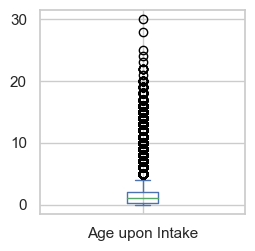

In [963]:
df['Age upon Intake'].plot(subplots=True, layout=(3, 3), kind='box', figsize=(9,9))
plt.show()
#Judging from the graph, we can say that the most ages are from 0 to 5, the other values are rare

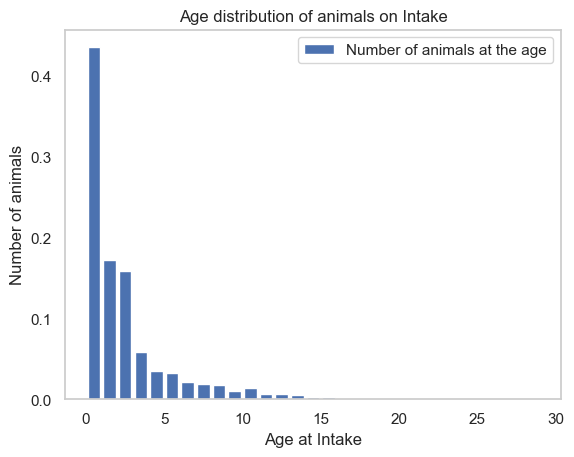

In [964]:
plt.hist(df['Age upon Intake'], bins=range(0, 30), label = 'Number of animals at the age', density=True, alpha=1, rwidth=0.8)
plt.title('Age distribution of animals on Intake')
plt.xlabel('Age at Intake')
plt.ylabel('Number of animals')
plt.grid(False)
plt.legend()
plt.show() 
#the greater the age, the fewer animals with that age.

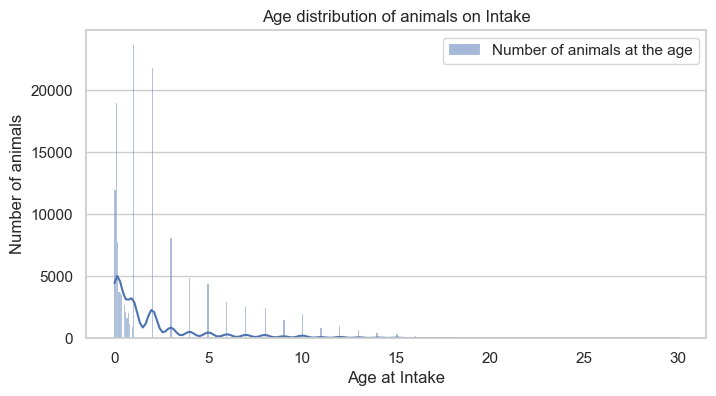

In [965]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age upon Intake'], kde=True, label = 'Number of animals at the age' )
plt.title('Age distribution of animals on Intake')
plt.xlabel('Age at Intake')
plt.ylabel('Number of animals')
plt.grid(axis='x')
plt.legend()
plt.show()

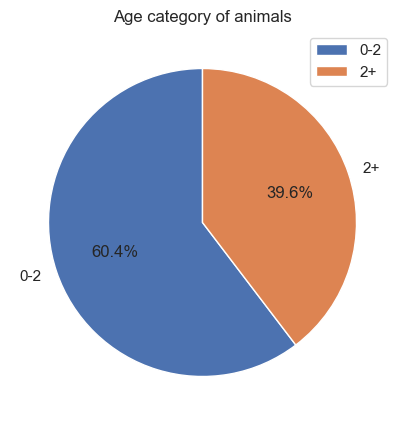

In [966]:
number_of_animals_in_category = df['Age Category'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(number_of_animals_in_category, labels= number_of_animals_in_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Age category of animals')
plt.legend()
plt.show()
# from graph we can see that there are 60% of animals in age 0-2
# earlier we added a column with age categories and divided each age into categories. Watch data cleaning

### Date analisis

In [967]:
#Date analisis
print(df['DateTime'].describe(datetime_is_numeric=True))
print(f"\nMedian date: {df['DateTime'].median()}")
print(f"\nMinimum date: {df['DateTime'].min()}")
print(f"\nMaximum date: {df['DateTime'].max()}")

count                           138565
mean     2017-09-03 04:33:46.595749120
min                2013-10-01 07:51:00
25%                2015-08-12 18:29:00
50%                2017-07-20 16:44:00
75%                2019-07-08 11:25:00
max                2022-04-27 07:54:00
Name: DateTime, dtype: object

Median date: 2017-07-20 16:44:00

Minimum date: 2013-10-01 07:51:00

Maximum date: 2022-04-27 07:54:00


In [968]:
df_date = df.groupby('Date').agg({'Animal ID': 'nunique'}).reset_index()
# new dataframe and .reset_index() for using all columns

In [969]:
df_date

,Date,Animal ID
0,2013-10-01,77
1,2013-10-02,53
2,2013-10-03,42
3,2013-10-04,47
4,2013-10-05,67
...,...,...
3123,2022-04-23,27
3124,2022-04-24,10
3125,2022-04-25,28
3126,2022-04-26,53


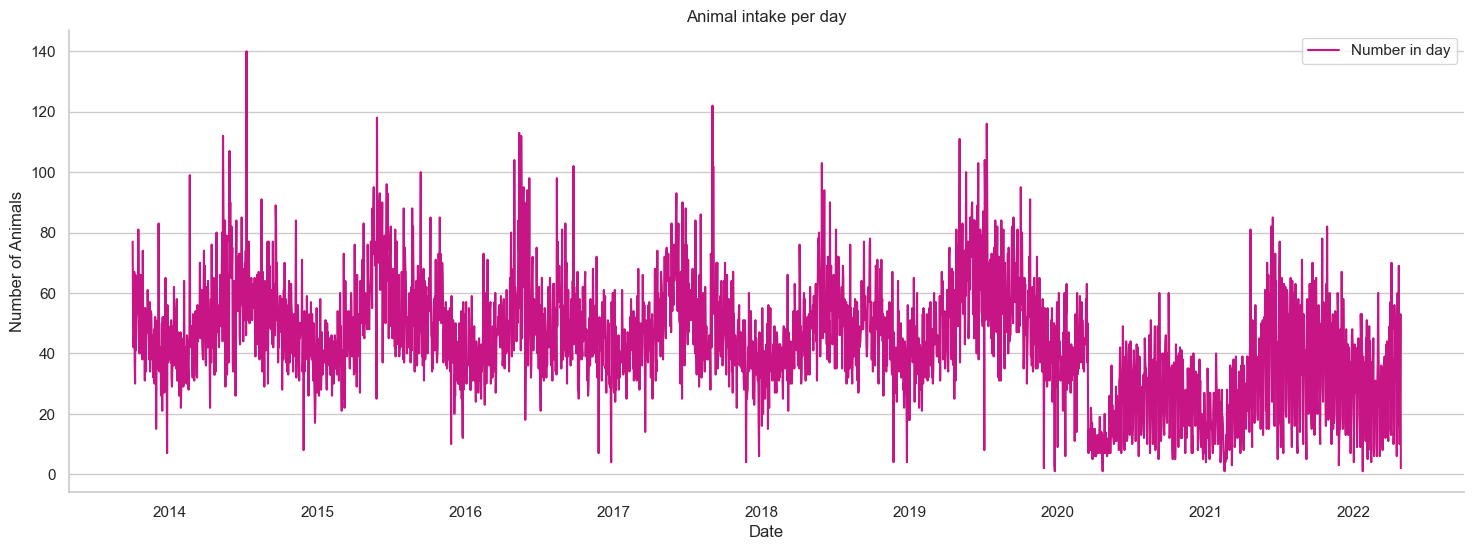

In [970]:
x = df_date['Date']
y = df_date['Animal ID']
fig, ax = plt.subplots(figsize=(18,6))

ax.plot(x, y, color ='#C71585', label='Number in day') 

plt.title('Animal intake per day')
plt.xlabel('Date')
plt.ylabel('Number of Animals')
plt.grid(axis='x')
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()
# graph shows how many animals were taken in each day, sinse year 2020 the number started to fall compared to previous years

### Analisis of MonthYear, Animal Type, Sex upon Intake



#### MonthYear analisis

In [971]:
print(df['MonthYear'].describe(datetime_is_numeric=True))
print(f"\nMedian month: {df['MonthYear'].median()}")
print(f"\nMinimum month: {df['MonthYear'].min()}")
print(f"\nMaximum month: {df['MonthYear'].max()}")

count                           138565
mean     2017-08-19 00:30:08.248836352
min                2013-10-01 00:00:00
25%                2015-08-01 00:00:00
50%                2017-07-01 00:00:00
75%                2019-07-01 00:00:00
max                2022-04-01 00:00:00
Name: MonthYear, dtype: object

Median month: 2017-07-01 00:00:00

Minimum month: 2013-10-01 00:00:00

Maximum month: 2022-04-01 00:00:00


In [972]:
# how many animals were taken in this month
df_month = df.groupby('MonthYear').agg({'MonthYear_name'  : 'max', 'Animal ID': 'nunique' }).reset_index()

In [973]:
df_month

,MonthYear,MonthYear_name,Animal ID
0,2013-10-01,October 2013,1575
1,2013-11-01,November 2013,1299
2,2013-12-01,December 2013,1255
3,2014-01-01,January 2014,1254
4,2014-02-01,February 2014,1176
...,...,...,...
98,2021-12-01,December 2021,973
99,2022-01-01,January 2022,906
100,2022-02-01,February 2022,713
101,2022-03-01,March 2022,880


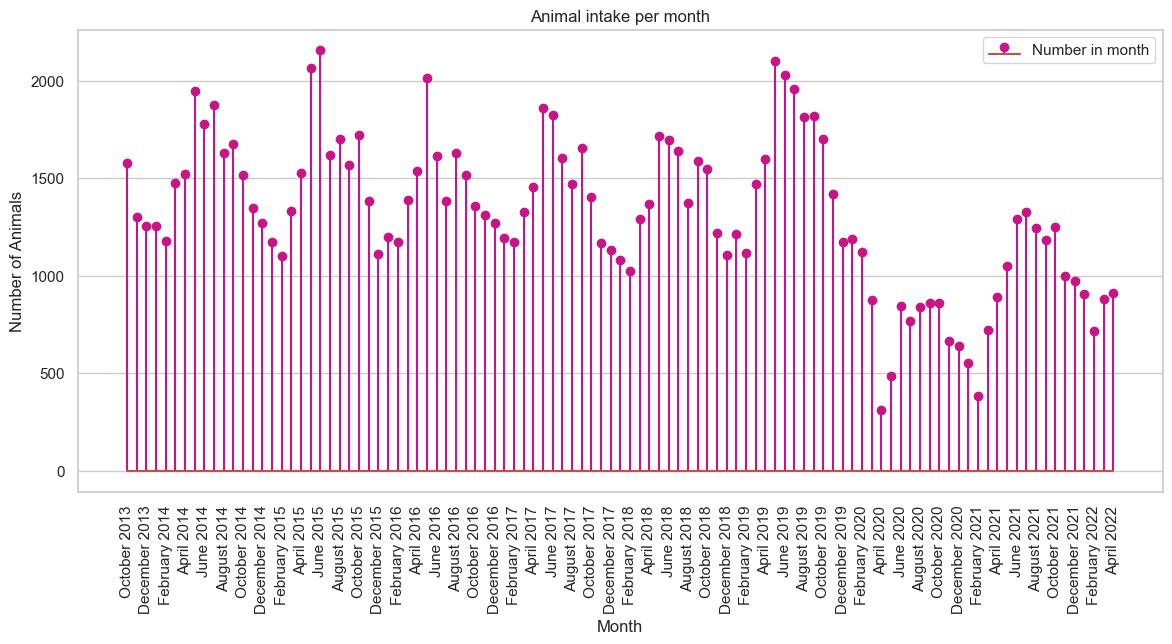

In [974]:
x = df_month['MonthYear_name']
y = df_month['Animal ID']
fig, ax = plt.subplots(figsize=(14,6))

ax.stem(x, y, linefmt ='#C71585', label='Number in month') #linefmt='#C71585'

plt.title('Animal intake per month')
plt.xlabel('Month')
plt.ylabel('Number of Animals')
plt.legend()
plt.grid(axis='x')
plt.xticks(ticks=plt.xticks()[0][::2])
plt.xticks(rotation=90)
plt.show()

#### Animal Type analisis

In [975]:
print(df['Animal Type'].describe())
print(f"\nUnique values: {df['Animal Type'].unique()}")

count     138565
unique         5
top          Dog
freq       78135
Name: Animal Type, dtype: object

Unique values: ['Dog', 'Cat', 'Other', 'Bird', 'Livestock']
Categories (5, object): ['Bird', 'Cat', 'Dog', 'Livestock', 'Other']


In [976]:
df_type = df.groupby('Animal Type').agg({ 'Animal ID': 'nunique' }).reset_index()

In [977]:
df_type

,Animal Type,Animal ID
0,Bird,661
1,Cat,49960
2,Dog,65900
3,Livestock,24
4,Other,7345


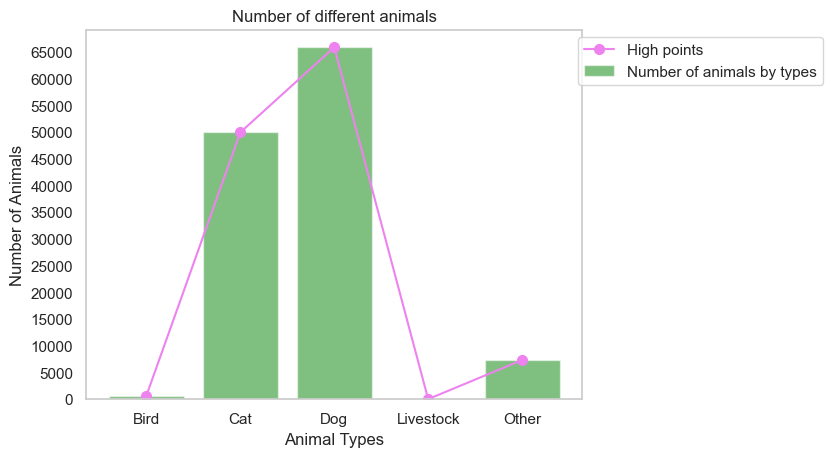

In [978]:
x = df_type['Animal Type']
y = df_type['Animal ID']
plt.bar(x, y, label='Number of animals by types', color = 'green', alpha=0.5)
plt.plot(x, y, color='violet', marker='o', markersize=7, label='High points')
plt.title('Number of different animals')
plt.xlabel('Animal Types')
plt.ylabel('Number of Animals')
plt.legend( loc='upper right', bbox_to_anchor=(1.5, 1))
plt.grid(False)
plt.yticks(range(0, max(y)+10, 5000))

plt.show()

#Cats and dags are most common animals

#### Sex upon Intake analisis

In [979]:
print(df['Sex upon Intake'].describe())
print(df['Sex upon Intake'].unique())

count          127498
unique              4
top       Intact Male
freq            45629
Name: Sex upon Intake, dtype: object
['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female', NaN]
Categories (4, object): ['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female']


In [980]:
df_sex = df.groupby('Sex upon Intake').agg({ 'Animal ID': 'nunique' }).reset_index()

In [981]:
df_sex
# How many animals in each group

,Sex upon Intake,Animal ID
0,Intact Female,42550
1,Intact Male,44485
2,Neutered Male,17260
3,Spayed Female,14935


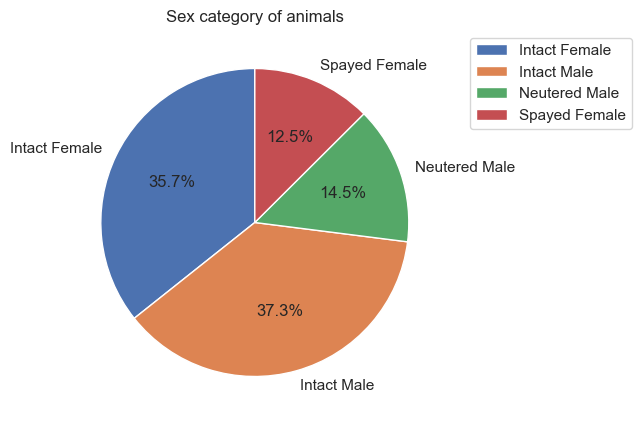

In [982]:
number_of_animals_in_sex_category = df_sex['Animal ID']
plt.figure(figsize=(5, 5))
plt.pie(number_of_animals_in_sex_category, labels = df_sex['Sex upon Intake'], autopct='%1.1f%%', startangle=90)
plt.title('Sex category of animals')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()
# most of the animals are intact

In [983]:
def sex_category(sex):
    if sex == 'Intact Female' or sex == 'Spayed Female':
        return 'Female'
    elif sex == 'Intact Male' or sex == 'Neutered Male':
        return 'Male'
    else:
        return np.nan
    
    # separeating males and females
    

In [984]:
df['Sex Category'] = df['Sex upon Intake'].apply(sex_category)

In [985]:
df_sex_cotegory = df.groupby('Sex Category').agg({ 'Animal ID': 'nunique' }).reset_index()

In [986]:
df_sex_cotegory
#How many animals of each sex

,Sex Category,Animal ID
0,Female,54650
1,Male,58184


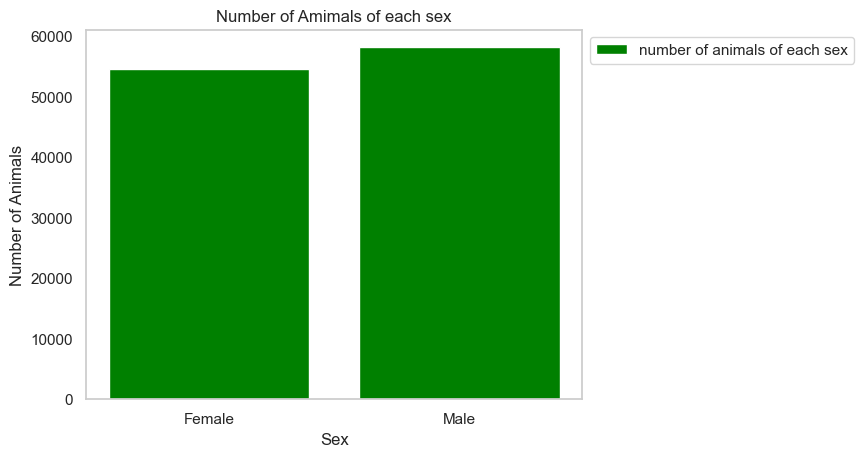

In [987]:
x = df_sex_cotegory['Sex Category']
y = df_sex_cotegory['Animal ID']

plt.bar(x, y,color ='green', label = 'number of animals of each sex')

plt.xlabel('Sex')
plt.ylabel('Number of Animals')
plt.title('Number of Amimals of each sex')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(False)
plt.show()
# There are almost equal number of males and females

### Dependancy of two parametrs

In [988]:
# Animal Type and Age upon Intake
# for this type of data we cant use regular metrics like p - value or correlation coefficient, but we can make Cross-tabulations, Chi-squared test of independence and Heatmap.

In [989]:
contingency_table = pd.crosstab(df['Animal Type'], df['Age upon Intake'])

print(contingency_table)
#shows the number of matches for each pair

Age upon Intake  0.00   0.01   0.02   0.04   0.06   0.08   0.10   0.17   \
Animal Type                                                               
Bird                 0      5     11     16      7     30      0      9   
Cat                433   1227   1945   2533   3633  12903    258   3884   
Dog                276    498    547    247    344   5239     91   3779   
Livestock            0      0      0      2      0      0      0      0   
Other               28     54     77     51     12    415      2     67   

Age upon Intake  0.25   0.33   ...  18.00  19.00  20.00  21.00  22.00  23.00  \
Animal Type                    ...                                             
Bird                 2      9  ...      3      0      1      0      0      0   
Cat               1965   1541  ...     24     10     15      0      6      0   
Dog               1672   2011  ...     27     17      5      0      0      1   
Livestock            5      2  ...      0      0      0      0      0     

In [990]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}") #measures how observed data diverges from expected data if variables are independent.
print(f"P-value: {p}") # in our case p = 0, wich means that there is some kind of association between the variables.
print(f"Degree of freedom: {dof}") #determine the number of independent values in the statistical calculation.
print("Expected frequency:") # values, expected by Null Hypothesis - hypothesis that says that there isnt any association between groups with variables
print(expected)

Chi2 value: 34434.70392142978
P-value: 0.0
Degree of freedom: 172
Expected frequency:
[[3.52772451e+00 8.53929516e+00 1.23494291e+01 1.36370246e+01
  1.91272553e+01 8.89685421e+01 1.68009675e+00 3.70435007e+01
  1.77726474e+01 1.73801461e+01 1.66047169e+01 1.29956202e+01
  1.00518609e+01 7.90267730e+00 9.87475668e+00 5.39449868e+00
  4.20263517e+00 1.13284472e+02 1.04213864e+02 3.86182922e+01
  2.32963843e+01 2.10466821e+01 1.40534588e+01 1.21962579e+01
  1.18037566e+01 6.88791801e+00 9.44396264e+00 3.83406694e+00
  4.59513641e+00 3.01555827e+00 2.12046399e+00 1.79497516e+00
  7.65856068e-01 4.26007438e-01 2.58476423e-01 1.29238211e-01
  1.05305209e-01 4.78660042e-03 2.87196025e-02 4.78660042e-03
  4.78660042e-03 4.78660042e-03 4.78660042e-03 4.78660042e-03]
 [2.77951502e+02 6.72816119e+02 9.73018827e+02 1.07446924e+03
  1.50704776e+03 7.00988408e+03 1.32375817e+02 2.91867934e+03
  1.40031740e+03 1.36939200e+03 1.30829547e+03 1.02393260e+03
  7.91992068e+02 6.22656621e+02 7.78037922e+0

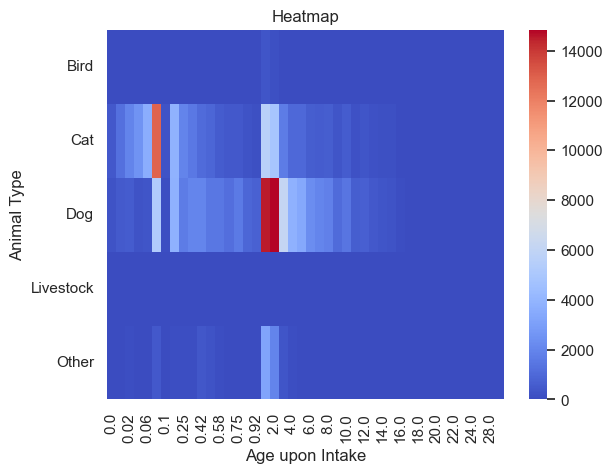

In [991]:
sns.heatmap(contingency_table, annot=False, fmt="d", cmap='coolwarm')

plt.title('Heatmap')
plt.ylabel('Animal Type')
plt.xlabel('Age upon Intake')
plt.yticks(rotation=0)
plt.show()

# Red colors mean high frequency - there is a lot of maches, blue means lower frequency.
# We can see clearly by this graph that dogs are usally intaken in age 2, cats in age of several months.


### Does Outcome Type depend on the Intake Type?

In [992]:
df['Intake Type'].unique()

['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife', 'Euthanasia Request', 'Abandoned']
Categories (6, object): ['Abandoned', 'Euthanasia Request', 'Owner Surrender', 'Public Assist', 'Stray', 'Wildlife']

In [993]:
df1['Outcome Type'].unique()

['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer', 'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate', NaN]
Categories (9, object): ['Adoption', 'Died', 'Disposal', 'Euthanasia', ..., 'Relocate', 'Return to Owner', 'Rto-Adopt', 'Transfer']

In [1012]:
contingency_table1 = pd.crosstab(df1['Outcome Type'], df['Intake Type']) #making Cross-tabulations for Heatmap


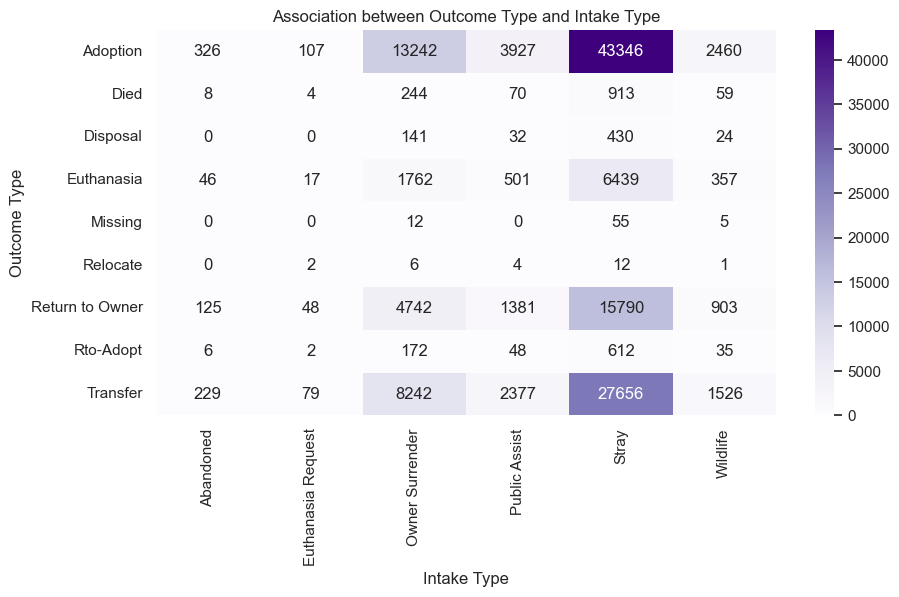

In [1013]:
plt.figure(figsize=(10, 5))
sns.heatmap(contingency_table1, annot=True, cmap='Purples', fmt='g')
plt.title('Association between Outcome Type and Intake Type')
plt.ylabel('Outcome Type')
plt.xlabel('Intake Type')
plt.show()
# By graph we can see that stray animals in most cases were adopted, transfered, returned to owner or died by euthanasia
# Animals that were intaken for returning to owner were mostly adopted, transfered or returned to owner
# Animals that were intaken due to public assist were also mostly adopted, transfered or returned to owner
# The other interconnections are less significant


### Does Age of Animal play role for adoption?

In [996]:
df1_adoption = df1[df1['Outcome Type'] == 'Adoption'].groupby('Age upon Outcome').agg({'Animal ID': 'nunique'}).reset_index()

In [997]:
df1_adoption.head()

,Age upon Outcome,Animal ID
0,0.01,3
1,0.02,1
2,0.04,6
3,0.06,17
4,0.08,2542


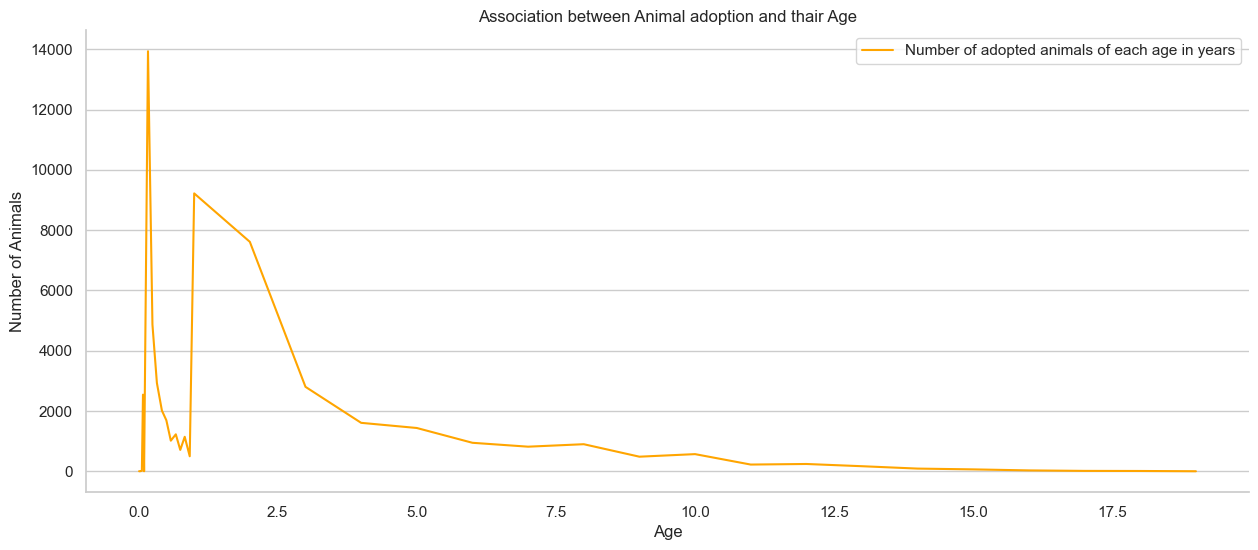

In [998]:
x = df1_adoption['Age upon Outcome']
y = df1_adoption['Animal ID']
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(x, y, color ='orange', label='Number of adopted animals of each age in years') 

plt.title('Association between Animal adoption and thair Age')
plt.xlabel('Age')
plt.ylabel('Number of Animals')


plt.legend()
plt.grid(axis='x')
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

plt.show()
#By the graph we can see that most animals are adopted in the Age from 0.1 to 2.7 years
#Older animals are adopted rearly

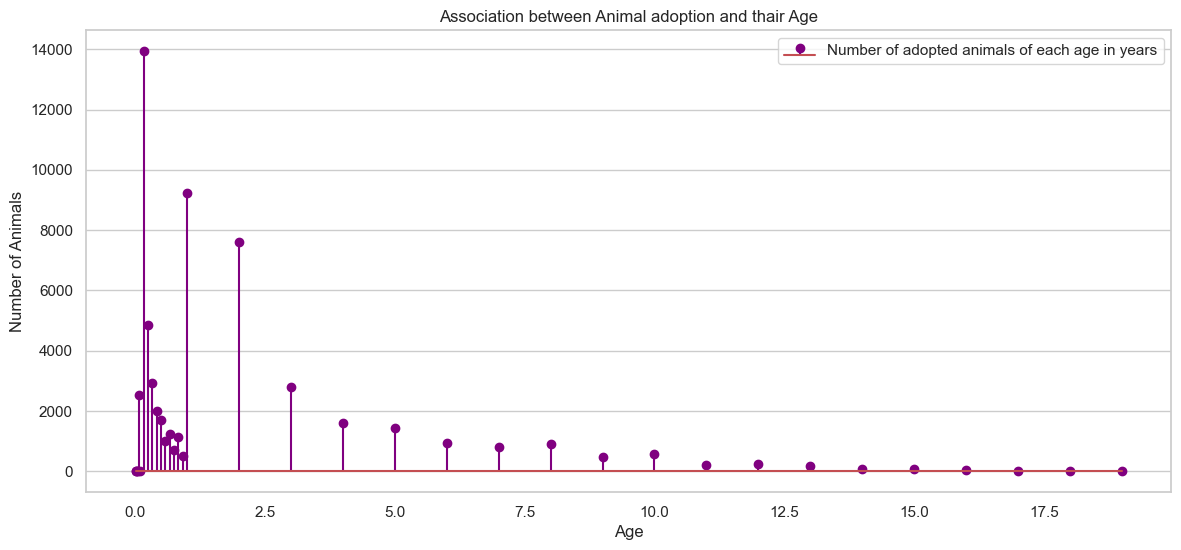

In [999]:
x = df1_adoption['Age upon Outcome']
y = df1_adoption['Animal ID']
fig, ax = plt.subplots(figsize=(14,6))

ax.stem(x, y, linefmt ='#800080', label='Number of adopted animals of each age in years') 

plt.title('Association between Animal adoption and thair Age')
plt.xlabel('Age')
plt.ylabel('Number of Animals')
plt.legend()
plt.grid(axis='x')

plt.show()

### Is the intake of animals constant throughout the year or are there periods with higher/lower loads?

In [1000]:
# I have done this graph previously, so i'll just leave the same graph here

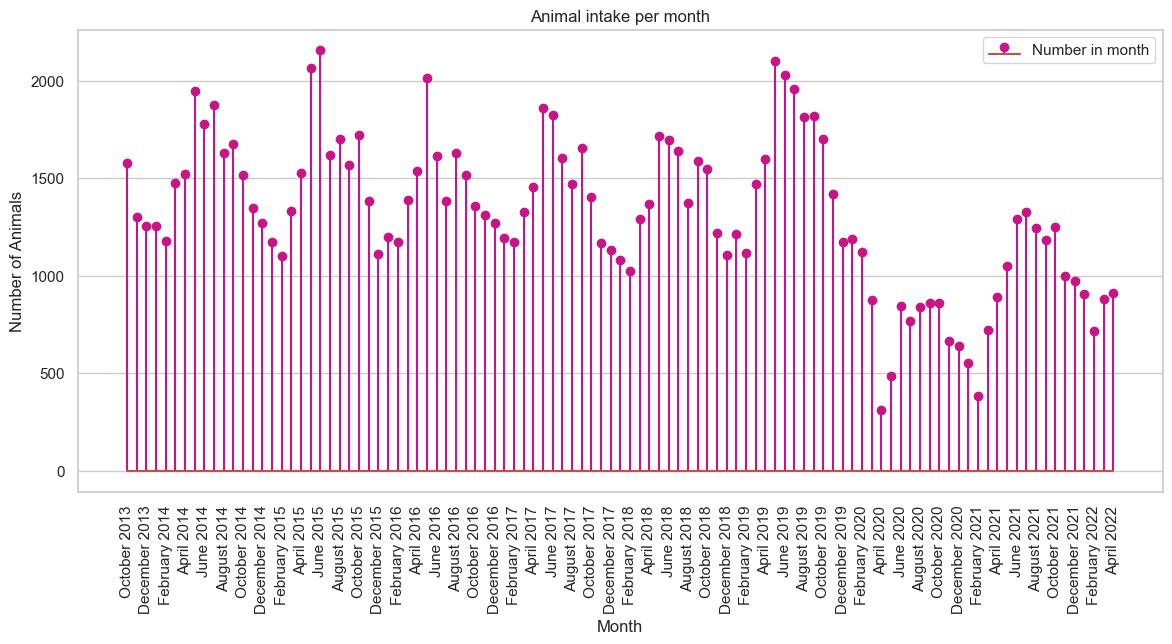

In [1001]:
x = df_month['MonthYear_name']
y = df_month['Animal ID']
fig, ax = plt.subplots(figsize=(14,6))

ax.stem(x, y, linefmt ='#C71585', label='Number in month')

plt.title('Animal intake per month')
plt.xlabel('Month')
plt.ylabel('Number of Animals')
plt.legend()
plt.xticks(ticks=plt.xticks()[0][::2])
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.show()
#By this graph we can see that there is a pattern, there are lows for every New Year period

### My Question: who had been intaken more dogs or cats?

In [1002]:
df_cats = df[df['Animal Type'] == 'Cat'].groupby('MonthYear').agg({'MonthYear_name'  : 'max', 'Animal ID': 'nunique' }).reset_index()

In [1003]:
df_dogs= df[df['Animal Type'] == 'Dog'].groupby('MonthYear').agg({'MonthYear_name'  : 'max', 'Animal ID': 'nunique' }).reset_index()

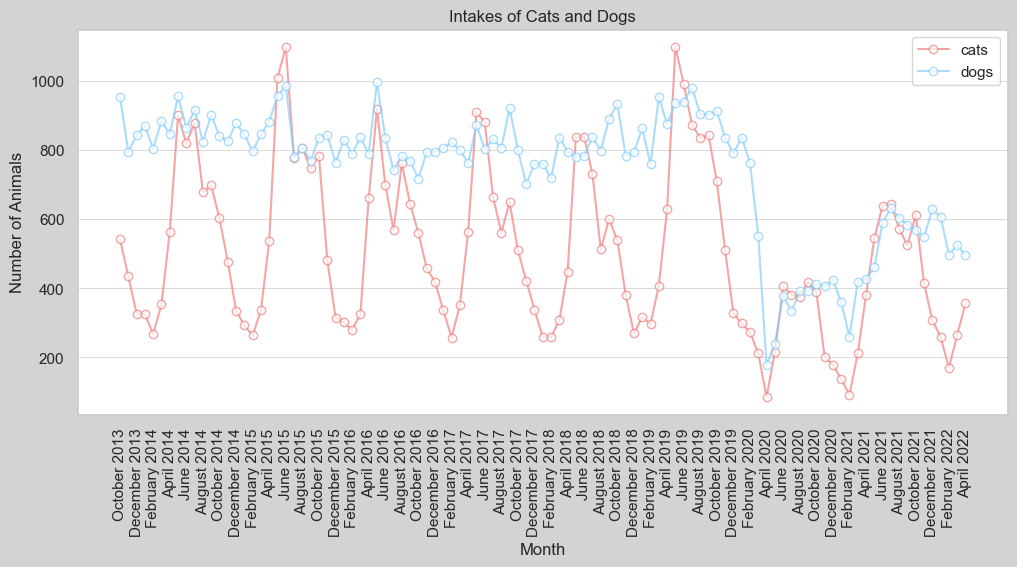

In [1004]:
fig, ax = plt.subplots(figsize=(12,5), facecolor = 'lightgray')

ax.plot(df_cats['MonthYear_name'], df_cats['Animal ID'], 'o-', color='lightcoral', markerfacecolor = 'white',alpha = 0.7, label='cats')
ax.plot(df_cats['MonthYear_name'], df_dogs['Animal ID'], 'o-', color='lightskyblue', markerfacecolor = 'white', alpha = 0.7, label='dogs')
 


ax.grid(axis='y', color='black', alpha=.2, linewidth=.5)

ax.set_ylabel('Number of Animals')
ax.set_xlabel('Month')
plt.xticks(ticks=plt.xticks()[0][::2])
plt.xticks(rotation=90)
plt.grid(axis='x')
ax.set_title('Intakes of Cats and Dogs')
_ = ax.legend()

#By the graph we can see that dogs were intaken constantly and a lot
#Cats were intaken more often in the middle of a year and rarely in New Year periods
#Dogs had been intaken more

### My Question: Cats of what breed were intaken mostly?

In [1005]:
df_breed = df[df['Animal Type'] == 'Cat'].groupby('Breed').agg({'Animal ID': 'nunique'}).reset_index()

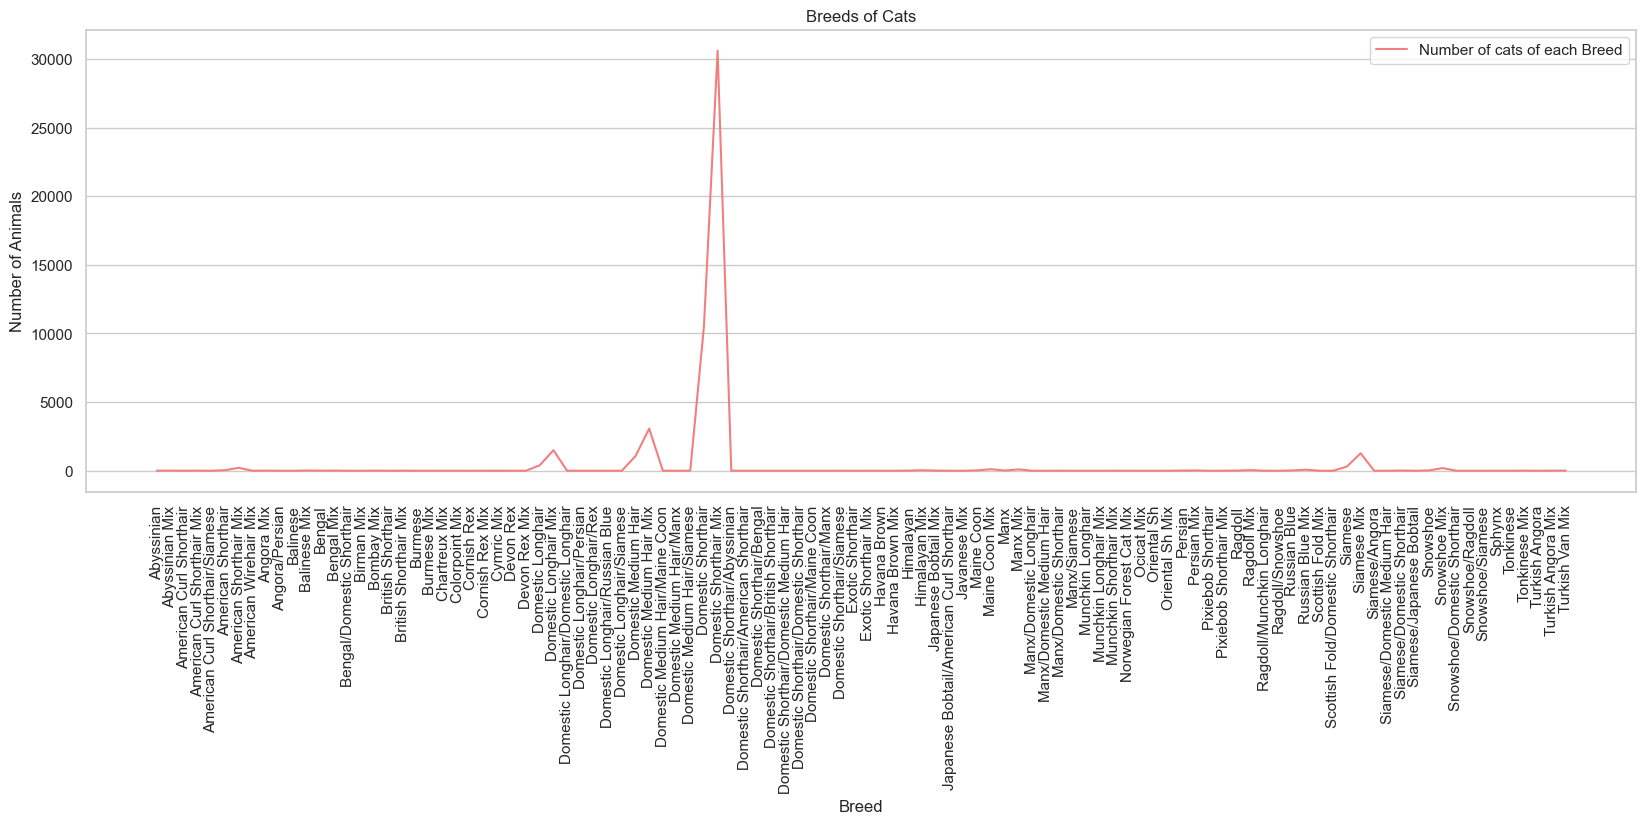

In [1006]:
x = df_breed['Breed']
y = df_breed['Animal ID']
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(x, y, color ='#F08080', label='Number of cats of each Breed') 

plt.title('Breeds of Cats')
plt.xlabel('Breed')
plt.ylabel('Number of Animals')
#plt.xticks(ticks=plt.xticks()[0][::2])
plt.xticks(rotation=90)


plt.legend()
plt.grid(axis='x')
plt.show()
#By Graph we can see thst Domestic Shorthair Mix is thr most popular

### My Question: Where more new animals, at AAC or in volunteer house?

In [1007]:
df2 = pd.read_csv('locations.csv')
df2.head()

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age,Image Link
0,A855691,"811 BURNSALL GATES DR78660\n(30.417121, -97.64...",Yes (come to the shelter),04/22/2022,Dog,Pit Bull Mix,Gray/White,Intact Male,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
1,A855620,8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...,Yes (come to the shelter),04/20/2022,Dog,Cairn Terrier Mix,Tan,Intact Male,3 months,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
2,A855431,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No (contact for more info),04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Male,4 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
3,A855432,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No (contact for more info),04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Female,4 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
4,A855461,"AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -...",No (contact for more info),04/18/2022,Cat,Siamese,Flame Point,Intact Female,6 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...


In [1008]:
df2['At AAC'].isnull().sum() #we dont have zero values so we can wark with the data

0

In [1009]:
new_df = df2.groupby('At AAC').agg({'Animal ID': 'nunique'}).reset_index()

In [1010]:
new_df

,At AAC,Animal ID
0,No (contact for more info),24
1,Yes (come to the shelter),78


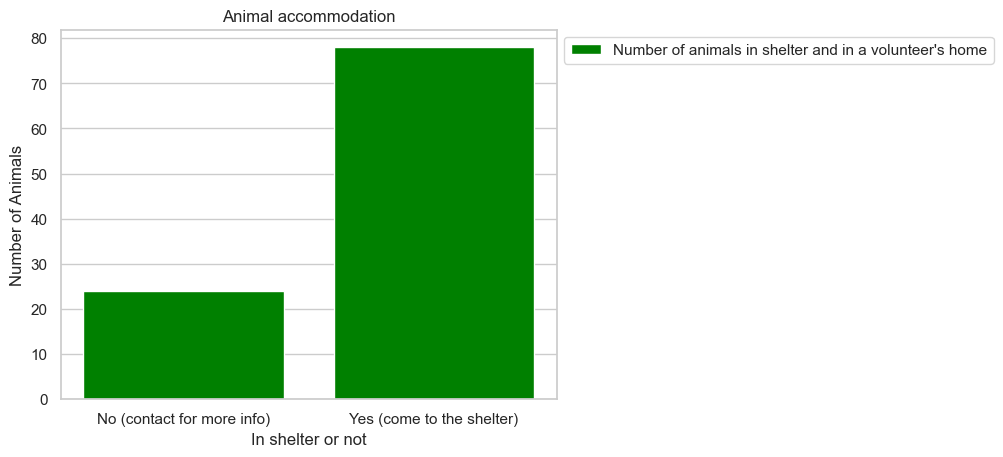

In [1011]:
x = new_df['At AAC']
y = new_df['Animal ID']

plt.bar(x, y,color ='green', label = "Number of animals in shelter and in a volunteer's home")

plt.xlabel('In shelter or not')
plt.ylabel('Number of Animals')
plt.title('Animal accommodation')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(axis = 'x')
plt.show()

#By the graph we can see that much more animals are at AAC